In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [3]:
np.random.seed(0)

num_samples = 100
gender = np.random.choice([0, 1], size=num_samples)

# Generate age data (assuming a normal distribution with mean 40 and standard deviation 10)
age = np.random.normal(loc=40, scale=10, size=num_samples).round(0)

# Generate number of cigarettes per day (assuming a Poisson distribution with mean 10)
cigarettes_per_day = np.random.poisson(lam=10, size=num_samples)

smoking_data = pd.DataFrame( {"Gender": gender, "Age": age, "CigarettesPerDay": cigarettes_per_day} )
# np.savetxt("./smoking_data.csv", smoking_data, delimiter=",", header="gender,age,cigarettesperday", comments="")
# smoking_data.to_csv("smoking_data.csv", index=False)

# Print first few rows of data
print("Smoking Data:")
smoking_data.head()

Smoking Data:


,Gender,Age,CigarettesPerDay
0,0,23.0,16
1,1,60.0,10
2,1,35.0,12
3,0,36.0,9
4,1,27.0,12


In [4]:
%%javascript
console.log('hello')

<IPython.core.display.Javascript object>

In [8]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)
    """
    import numpy as np
    from matplotlib import pyplot as plt

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    X_diffs = np.asarray([i - X_bar for i in X])
    Y_diffs = np.asarray([i - Y_bar for i in Y])

    num = X_diffs.dot(Y_diffs)

    denom = np.sqrt((X_diffs**2).sum() * (Y_diffs**2).sum())

    r_pearson = num / denom

    beta_1 = r_pearson * Y_diffs.std() / X_diffs.std()

    beta_0 = Y_bar - beta_1 * X_bar

    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0

    fig, ax = plt.subplots()
    ax.plot(X, Y, "ro", label="datapoints")
    ax.plot(Xs, Ys, "k", label=f"y={round(beta_1, 2)}x+{round(beta_0, 2)}")
    plt.legend()
    plt.show()

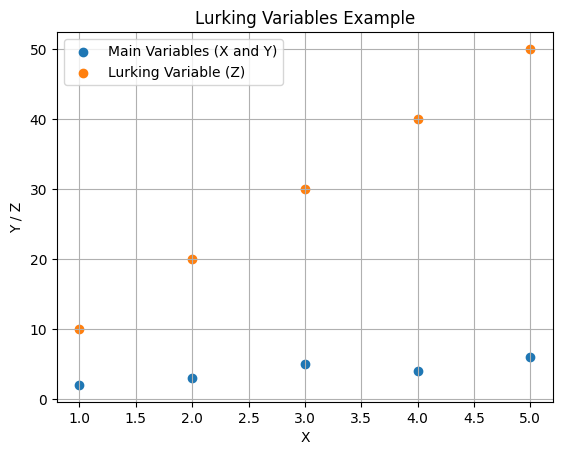

In [6]:
# Hypothetical data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 4, 6]
z = [10, 20, 30, 40, 50]  # Lurking variable

# Plotting
plt.scatter(x, y, label="Main Variables (X and Y)")
plt.scatter(x, z, label="Lurking Variable (Z)")
plt.xlabel("X")
plt.ylabel("Y / Z")
plt.title("Lurking Variables Example")
plt.legend()
plt.grid(True)
plt.show()